In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
sns.set()

import warnings
warnings.filterwarnings('ignore')


In [2]:
rand_state=1000

In [3]:
read_file = pd.read_csv(r'C:\Users\atsed\Desktop\Thesis_Reg\AOI_hitStimuli2Polygon.txt') 

In [4]:
read_file.to_csv (r'C:\Users\atsed\Desktop\Thesis_Reg\AOI_hitStimuli2PolygonTEST.csv', index=None)

In [18]:
df = pd.read_table('AOI_hitStimuli2Polygon.csv')

In [19]:
df.head()

,Skill_level,Gaze_point_X,Gaze_point_Y,Gaze_event_duration,Fixation_point_X,Fixation_point_Y,AOI_hit_Stimuli2_Polygon
0,Skilled,606,219,416,614,221,0
1,Skilled,607,227,416,614,221,0
2,Skilled,614,225,416,614,221,0
3,Skilled,616,227,416,614,221,0
4,Skilled,614,225,416,614,221,0


In [20]:
df.nunique()

Skill_level                   2
Gaze_point_X                627
Gaze_point_Y                664
Gaze_event_duration         116
Fixation_point_X            375
Fixation_point_Y            490
AOI_hit_Stimuli2_Polygon      2
dtype: int64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26498 entries, 0 to 26497
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Skill_level               26498 non-null  object
 1   Gaze_point_X              26498 non-null  int64 
 2   Gaze_point_Y              26498 non-null  int64 
 3   Gaze_event_duration       26498 non-null  int64 
 4   Fixation_point_X          26498 non-null  int64 
 5   Fixation_point_Y          26498 non-null  int64 
 6   AOI_hit_Stimuli2_Polygon  26498 non-null  int64 
dtypes: int64(6), object(1)
memory usage: 1.4+ MB


In [22]:
df.isna().sum()

Skill_level                 0
Gaze_point_X                0
Gaze_point_Y                0
Gaze_event_duration         0
Fixation_point_X            0
Fixation_point_Y            0
AOI_hit_Stimuli2_Polygon    0
dtype: int64

In [23]:
df.describe()

,Gaze_point_X,Gaze_point_Y,Gaze_event_duration,Fixation_point_X,Fixation_point_Y,AOI_hit_Stimuli2_Polygon
count,26498.000000,26498.000000,26498.000000,26498.000000,26498.000000,26498.000000
mean,643.718130,330.345007,602.967507,643.684769,330.370556,0.582384
std,111.420138,141.526528,543.395672,111.037920,141.086568,0.493176
min,189.000000,-94.000000,66.000000,195.000000,-81.000000,0.000000
25%,596.000000,206.000000,250.000000,597.000000,204.000000,0.000000
50%,682.000000,334.000000,416.000000,686.000000,335.000000,1.000000
75%,722.000000,424.000000,765.000000,722.000000,423.000000,1.000000
max,1637.000000,954.000000,3411.000000,1626.000000,948.000000,1.000000


<Figure size 600x400 with 0 Axes>

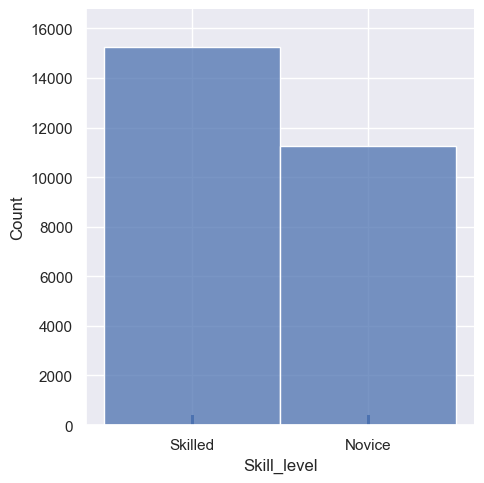

In [24]:
plt.figure(figsize=(6,4))
sns.displot(df['Skill_level'], rug=True)
plt.show()

In [25]:
ordinal_categoricals = ['Skill_level']

In [26]:
from sklearn.preprocessing import OrdinalEncoder

In [27]:
enc = OrdinalEncoder()

In [28]:
df[ordinal_categoricals] = enc.fit_transform(df[ordinal_categoricals])

In [29]:
df.head()

,Skill_level,Gaze_point_X,Gaze_point_Y,Gaze_event_duration,Fixation_point_X,Fixation_point_Y,AOI_hit_Stimuli2_Polygon
0,1.0,606,219,416,614,221,0
1,1.0,607,227,416,614,221,0
2,1.0,614,225,416,614,221,0
3,1.0,616,227,416,614,221,0
4,1.0,614,225,416,614,221,0


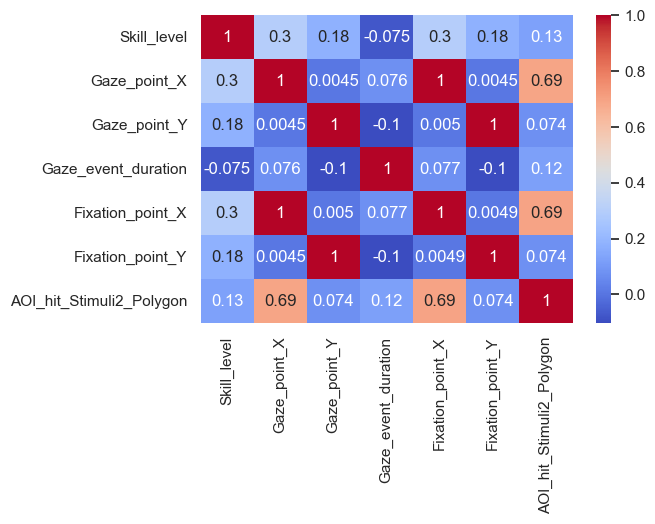

In [30]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)
plt.show()

CPU times: total: 13.5 s
Wall time: 14.5 s


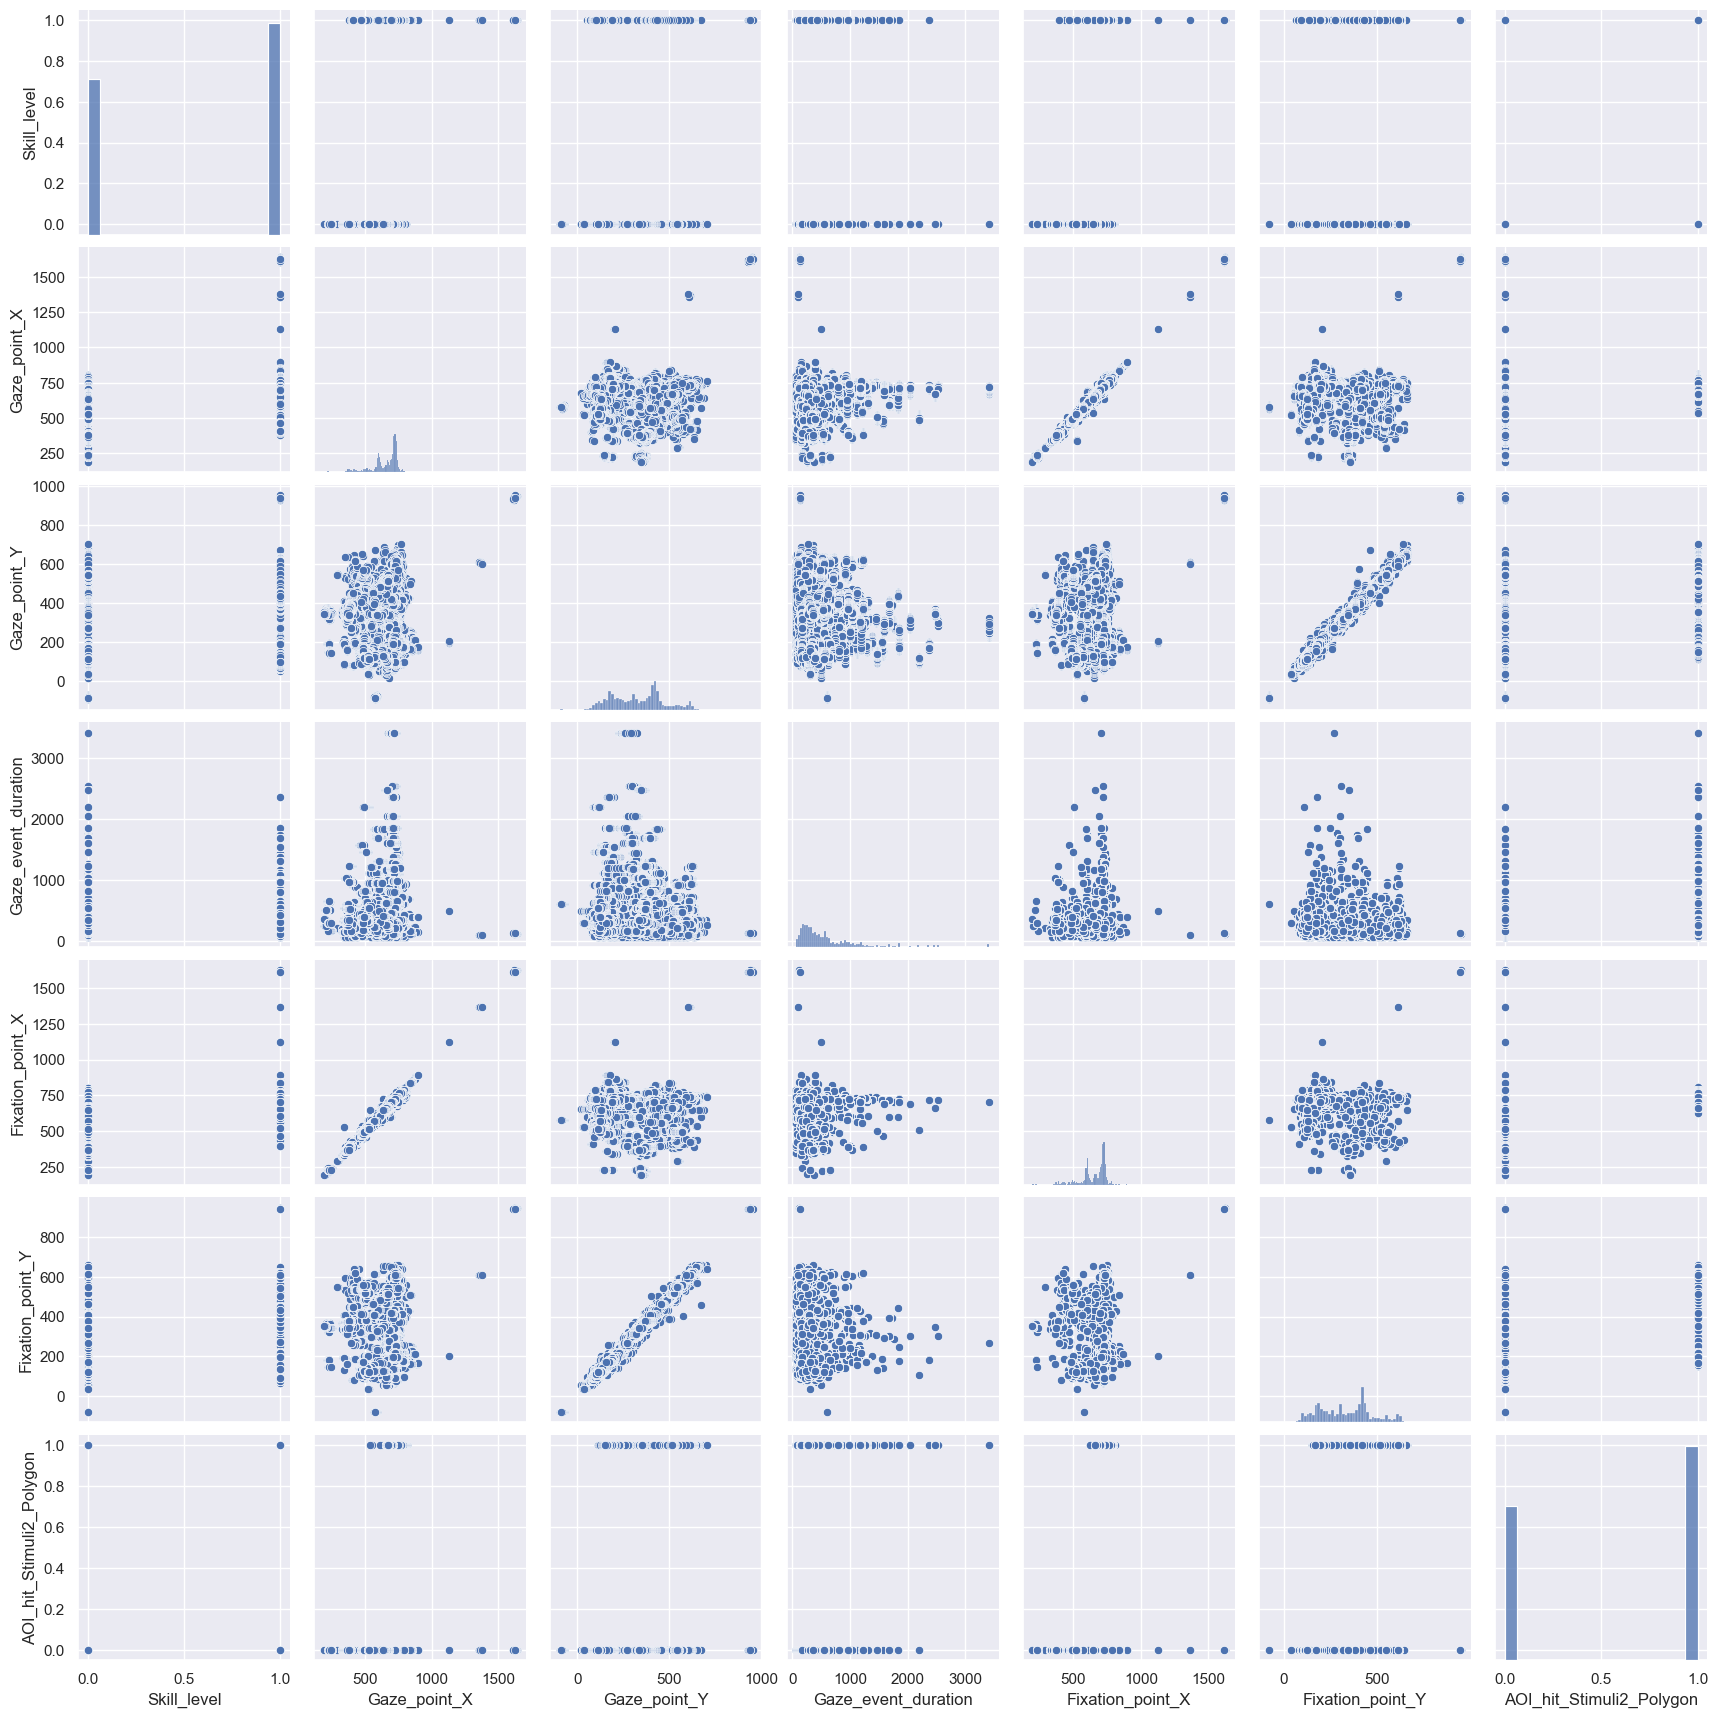

In [32]:
%%time

sns.pairplot(df[['Skill_level', 'Gaze_point_X', 'Gaze_point_Y', 'Gaze_event_duration', 'Fixation_point_X', 'Fixation_point_Y', 'AOI_hit_Stimuli2_Polygon' ]])

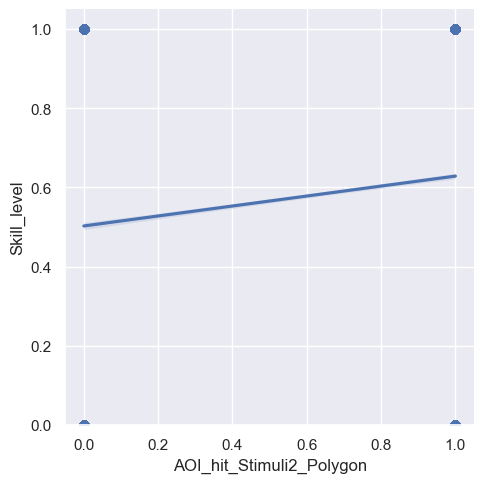

In [33]:
g= sns.lmplot(x='AOI_hit_Stimuli2_Polygon', y='Skill_level', data=df)
g.set(ylim=(0, None))
plt.show()

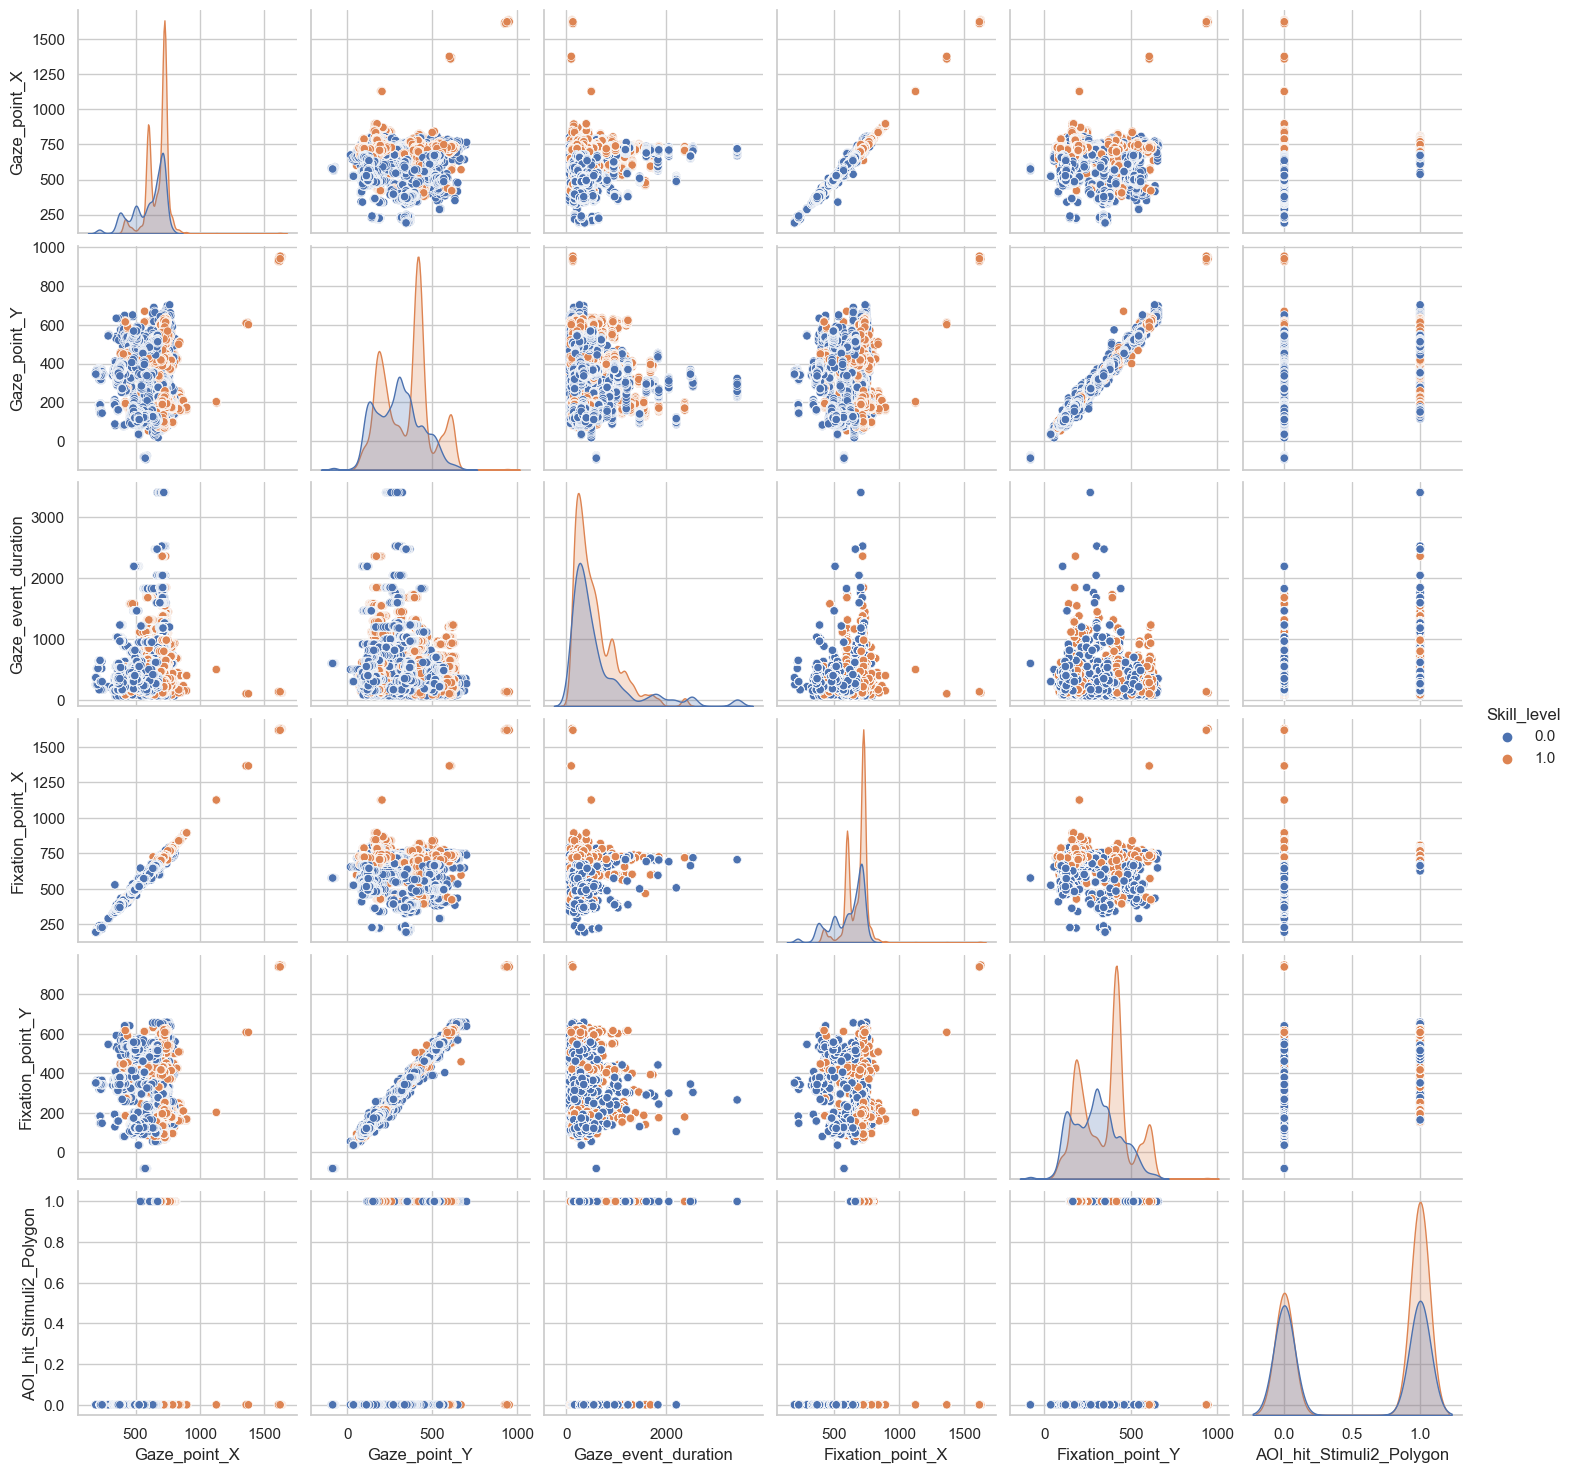

In [34]:
sns.set_style('whitegrid')
sns.pairplot(df, hue='Skill_level')

In [35]:
y = df['Skill_level']
X = df.drop('Skill_level', axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rand_state)

np.round(len(X_train)/len(X),3)

0.8

In [36]:
reg_model = LinearRegression()


In [37]:
X_train.head()

,Gaze_point_X,Gaze_point_Y,Gaze_event_duration,Fixation_point_X,Fixation_point_Y,AOI_hit_Stimuli2_Polygon
8677,672,280,183,688,272,1
14441,536,159,1115,563,154,0
3092,734,253,549,734,253,1
23759,461,131,200,462,132,0
17603,574,448,1830,595,443,0


In [38]:
reg_model.fit(X_train, y_train)

LinearRegression()

In [39]:
y_hat = reg_model.predict(X_test)

In [40]:
df_predictions = pd.DataFrame({'actuals':y_test, 'predictions':y_hat, 'resid': y_test - y_hat})
df_predictions.head()

,actuals,predictions,resid
17861,0.0,0.579068,-0.579068
6004,1.0,0.803194,0.196806
26253,0.0,0.183261,-0.183261
3533,1.0,0.620495,0.379505
22294,1.0,0.591842,0.408158


In [41]:
reg_model.coef_

array([-4.43458685e-04, -1.28676173e-04, -5.98687181e-05,  2.36591340e-03,
        7.70426674e-04, -1.77594814e-01])

In [42]:
reg_model.intercept_

-0.733092524553876

In [43]:
reg_summary = pd.DataFrame(data= X_train.columns, columns=['Features'])
reg_summary ['Coefficients'] = np.round(reg_model.coef_,4)
reg_summary

,Features,Coefficients
0,Gaze_point_X,-0.0004
1,Gaze_point_Y,-0.0001
2,Gaze_event_duration,-0.0001
3,Fixation_point_X,0.0024
4,Fixation_point_Y,0.0008
5,AOI_hit_Stimuli2_Polygon,-0.1776


In [44]:
reg_model.score(X_train, y_train)

0.14442339121344905

In [46]:
print('Training data R-squared:', np.round(reg_model.score(X_train, y_train),3))
print('Test data R-squared:', np.round(reg_model.score(X_train, y_train),3))

Training data R-squared: 0.144
Test data R-squared: 0.144


In [47]:
X_train.shape

(21198, 6)

In [48]:
def adj_R2(X,y):
    R2 = reg_model.score(X,y)
    n = X.shape[0]
    k = X.shape[1]
    return np.round(1-(1-R2)*(n-1)/(n-k-1),3)

In [49]:
adj_R2(X_train, y_train)

0.144

In [50]:
df_predictions.head()

,actuals,predictions,resid
17861,0.0,0.579068,-0.579068
6004,1.0,0.803194,0.196806
26253,0.0,0.183261,-0.183261
3533,1.0,0.620495,0.379505
22294,1.0,0.591842,0.408158


In [51]:
MSE_test = np.mean(np.square(df_predictions['resid']))
np.round(MSE_test,3)

0.211

In [52]:
RMSE_test = np.sqrt(MSE_test)
np.round(RMSE_test,3)

0.46

In [53]:
from sklearn.model_selection import cross_val_score
import sklearn.metrics

In [54]:
my_estimator = LinearRegression()

In [55]:
R2 = cross_val_score(estimator=my_estimator, X=X_train, y=y_train, cv=5, scoring="r2")

In [56]:
R2

array([0.14256625, 0.14706254, 0.14430132, 0.14497166, 0.14051863])

In [57]:
R2_CV = np.mean(R2)
np.round(R2_CV,3)

0.144

In [58]:
NMSE = cross_val_score(estimator=my_estimator, X=X_train, y=y_train, cv=5, scoring="neg_mean_squared_error")

In [59]:
MSE = -NMSE
MSE

array([0.20971566, 0.20849675, 0.20758342, 0.20804414, 0.21052239])

In [60]:
MSE_CV = np.mean(MSE)
np.round(MSE_CV,3)

0.209

In [61]:
RMSE = np.sqrt(MSE)
RMSE

array([0.45794722, 0.45661445, 0.45561323, 0.45611856, 0.45882719])